<h1> Least Squares </h1>

Nomidan malumki u kvadratlar yig'indisini minimallashtirishga harakat qiladi. 
Scikit learn library da uning formulasi quyidagicha ko'rinishga ega.

<img src='https://miro.medium.com/max/187/1*w4pissUaRbANQWt9XQE6jA.png'/>

Bunday masalalarni yechish odatda SVD (Singular value decomposition) bilan osongina amalga oshadi.  Biz esa biroz detail information bermoqchi miz.

Agar siz allaqachon Linear regressionni dagi mean square errorni  ko'rgan bo'lsangiz uning formulasini eslasangiz kerak, va u quyidagicha :

<img src='https://miro.medium.com/max/1400/0*OAdhpUn7ovxcqubq.png'/>


Ko'rib turganizdek ular juda ham o'xshash.

Umuman olganda bizga x vector berilgan bo'lsa uning magnitudasi quyidagi formula bilan topiladi:

<img src='https://miro.medium.com/max/876/1*UfFFdLeNQgM2rslACiLOUQ.png'/>

Xuddi shunday bizga o'zimizning berilgan w coeffisientlardagi error function ni A deb belgilab uning magnitutadisini topishimiz va uni minimallashtirishimiz kerak.

<img src='https://miro.medium.com/max/259/1*O2QGdSk9EwAy1CPyNBf8ww.png'/>

ya'ni

<img src='https://miro.medium.com/max/116/1*qmynvUUSrYSG9D4FdaUlxQ.png'/>

Agar EVD (Eigen value decomposition) ni o'rgangan bo'lsangiz eslasangiz kerak, matritsaning euclidian normasi uning covariance matrixnining eng katta eigenvalue sini ildiziga teng. Covariance matrixni topish uchun esa matrixni o'zining transpose qilingani bilan ko'paytirish kerak.

<img src='https://miro.medium.com/max/2000/1*rxqBxvyeQ75yV3xY6gC57g.png'/>
<img src='https://miro.medium.com/max/1400/1*ObXJ9cKBzd70iTtgy1L_iw.png'/>


Bizning ushbu javobimiz errorni beradi. Endigi navbat esa uni minimallashtirishda. Formulaga etibor bersak  :

<img src='./imgs/Screenshot from 2020-04-29 09-37-46.png'/>


uning erishishi mumkin bo'lgan eng kichik minimali 0 ga teng bo'ladi, bu esa bizga Xw-y = 0 tenglamani beradi. uni topish uchun esa X ning inverse matrixini y ga ko'paytirishimiz kerak holos. Ammo X ning inverse matrixini topish mushkul, chunki u vektor yani 1 o'lchamli matrix. Bu holatda biz uning pseudo inverse matrixidan foydalanishimiz mumkin.
 
 <img src='https://miro.medium.com/max/198/1*kkr4AdNe36egdlAhOWiOXg.png'/>
 
 Va bizning X matriximizning  pseude inverese matrixi quyidagicha topiladi:
 
 <img src='https://miro.medium.com/max/272/1*K4yXDeZfHutq5C2VCFqemA.png'/>
 
 
 Agar SVD ni eslasanigiz uning formulasi yuqoridagi tenglama bilan bir xilligini sezishiz mumkin, shunday qilib biz minimize qilish uchun SVD dan foydalanamiz:
 
 <img src='https://miro.medium.com/max/257/1*S8CqU4G8D2WcUom5nqV4lg.png'/>
 
 Biz sigma matrixning diagonalidan D^+ matrixni hosil qilamiz bu yerda + beligisi diagonal matrixning hamma qiymati 0 dan yuqori bo'lishi kerak ekanligini ko'rsatadi.
 
 <img src='https://miro.medium.com/max/720/1*llAdOsMYOPWmolQbTgVweQ.png'/>
 
 Va biz X ning inverse ni topish uchun shunchaki biz hosil qilgan diagonal matrixning inverseni hisoblaymiz holos:
 
 <img src='https://miro.medium.com/max/786/1*0ye7Wss20-xtClHgsSkUUg.png'/>
 
 
 

Mean squares ning SVD bilan yechilishining kamchiligi, agar datada error (outlier) qarab yechimda xatolik exponential tarzda oshadi, buning oldini olish uchun Ransac metodi bor, ammo u ham mukammal emas. Yaxshiroq yechim bu xatolikni topib shu xatolikni iterative ravishda kichiklashtirishga harakat qilishdir. Bunda input to'g'ri yoki noto'griligining ahamiyati yo'q javobni  iloji boricha lossni kichiklashtirib chiqaradi.

<pre>from scipy.optimize import least_squares</pre> shu vazifani bajaradi. U costni cost steplar yordamida kichiklashtirib boraveradi toki maximum evaluation lar soniga yetugnicha yoki termination qiymatlar qanoatlantirilguncha.

termination qiymatlar quyidagicha :

ftoI - costning o'zgarishi yani cost step ga qarab termination bo'ladi.(default: 1e-8)

xtoI - parameterlarning o'zgarishiga qarab termination bo'ladi. (default: 1e-8)

to'liqroq malumot olish uchun quyidagi linkga murojaat qiling :

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html


In [483]:
import numpy as np
from scipy.optimize import least_squares
# yuqoridagi saydan misol keltiraman
def gen_data(t, a, b, noise=0, n_outliers=0, random_state=0):
    # bizning funksiyamiz, siz ham xohlagan funksiyangizni olsangiz bo'ladi.
    y = a + b * t  * a

    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error
# avvaliga biror bir yechilishi kerak bo'lgan misol olib olamiz:
# a, b va c bizning funksiyamizning topilishi kerak bo'lgan parameterlari
a = 0.5
b = 2.0
c = -1
t_min = 0
t_max = 10
n_points = 15

t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, noise=0.5, n_outliers=5)

In [484]:
# endi esa biz loss functionni belgilashimiz kerak(input va outputga bog'liq holda)
def fun(params, t, y):
    # bu formulaning qanday kelib chiqqanini bilmoqchi bo'lsangiz gen_data ga qarang
    return params[0] + params[1]  * t*params[0] - y


In [485]:
# boshlang'ich parameterlar (random)
params = np.array([1.0, 1.0, 0.0])
res_lsq = least_squares(fun, params, args=(t_train, y_train), verbose=2)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.9712e+01                                    2.16e+01    
       1              3         6.7460e+01      2.25e+00       3.54e-01       3.53e+01    
       2              5         6.4989e+01      2.47e+00       1.77e-01       1.31e+01    
       3              6         6.2490e+01      2.50e+00       3.54e-01       4.24e+01    
       4              7         6.2256e+01      2.34e-01       7.07e-01       1.83e+02    
       5              8         5.5499e+01      6.76e+00       1.77e-01       5.96e+00    
       6              9         5.3833e+01      1.67e+00       3.54e-01       3.23e+01    
       7             10         5.2610e+01      1.22e+00       7.07e-01       1.14e+02    
       8             11         5.1862e+01      7.48e-01       7.07e-01       6.76e+01    
       9             13         5.1405e+01      4.57e-01       3.54e-01       2.05e+01    

In [490]:
res_soft_l1 = least_squares(fun, params, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))
res_log = least_squares(fun, params, loss='cauchy', f_scale=0.1,
                        args=(t_train, y_train))

In [505]:
# endi ushbu masalani svd yordamida yechib ko'ramiz:
XX = np.c_[np.ones(len(t_train)), t_train]

u, s, vt = np.linalg.svd(XX)
# bizning yechim esa y=ax + b ni qanoatlantiradi
sigma = np.zeros(XX.shape)
sigma_inv = np.zeros(XX.shape).T
sigma_inv[:2, :2] = np.diag(1 / s[:2])
sigma_inv = sigma_inv.round(3)
_w = ( vt.T @ sigma_inv @ u.T) @ y_train

# agar siz egri chiziqli funksiy a hosil qilmoqchi bo'lsangiz, unda XX va get_y_svd ni o`zgartiring.
def get_y_svd(t):
    return np.c_[np.ones(len(t)), t] @ _w


In [506]:
XX

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.71428571],
       [ 1.        ,  1.42857143],
       [ 1.        ,  2.14285714],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.57142857],
       [ 1.        ,  4.28571429],
       [ 1.        ,  5.        ],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.42857143],
       [ 1.        ,  7.14285714],
       [ 1.        ,  7.85714286],
       [ 1.        ,  8.57142857],
       [ 1.        ,  9.28571429],
       [ 1.        , 10.        ]])

In [507]:
t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log = gen_data(t_test, *res_log.x)
y_svd = get_y_svd(t_test)

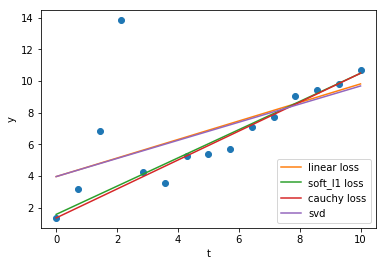

In [513]:
import matplotlib.pyplot as plt
plt.plot(t_train, y_train, 'o')
# plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.plot(t_test, y_soft_l1, label='soft_l1 loss')
plt.plot(t_test, y_log, label='cauchy loss')
plt.plot(t_test, y_svd, label='svd')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()